In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import scipy.spatial as spa

In [4]:
X = np.genfromtxt("dataset.csv", delimiter = ",", skip_header = 1)
initial_centroids = np.genfromtxt("initial_centroids.csv", delimiter = ",")

In [5]:
N = X.shape[0]
D = X.shape[1]
K = initial_centroids.shape[0]

In [6]:
#Initilize
centroids = initial_centroids
memberships = np.argmin(spa.distance_matrix(centroids, X), axis = 0)
covariance = np.asarray([np.cov(X[memberships == c].T) for c in range(K)])
priors = np.asarray([np.mean(memberships == c) for c in range(K)])
H = np.zeros((N,K))

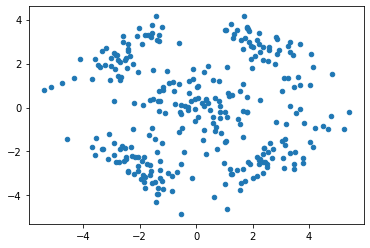

In [13]:
plt.plot(X[:, 0],X[:, 1], ".", markersize=9)

In [7]:
for i in range(100):
    #E-step
    H = np.asarray([stats.multivariate_normal.pdf(X, mean=centroids[c], cov = covariance[c])*priors[c] for c in range(K)]
                  / np.sum([stats.multivariate_normal.pdf(X, mean=centroids[c], cov = covariance[c]) for c in range(K)], axis=0)).T

    centroids = np.dot(H.T,X) / np.repeat(np.sum(H, axis=0),2).reshape(K, D)
    #M-step
    priors = np.sum(H, axis = 0) / N
    covariance = np.zeros((K, D, D))
    for c in range(K):
        for i in range(N):
            covariance[c] += H[i][c]*np.outer(X[i] - centroids[c], X[i] - centroids[c])
        covariance[c] /= H[:,c].sum()

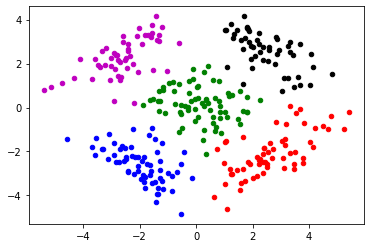

In [8]:
clusters = np.argmin(spa.distance_matrix(centroids, X), axis = 0)
colors = [".b",".k",".r",".g",".m"]
for c in range(K):  
    plt.plot(X[clusters == c, 0],X[clusters == c,1], colors[c],markersize=9)
plt.show()